In [1]:
#install required libraries
!pip install -q tensorflow matplotlib sklearn

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#loading covid data from official WHO database
data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv",skipinitialspace=True)
data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
#describe/summary data
data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,71675.000000,7.167500e+04,71675.000000,71675.000000
mean,647.417537,5.181665e+04,16.722274,1850.277740
std,4238.943480,3.749514e+05,108.067799,11221.005157
min,-8261.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,1.000000,2.790000e+02,0.000000,5.000000
75%,79.000000,6.606500e+03,1.000000,120.000000
max,99356.000000,9.032465e+06,6409.000000,228998.000000


In [5]:
#no cleaning is required as there is no na present in Date_reported, Cumulative_cases and Cumulative_deaths
data.isna().sum()

Date_reported          0
Country_code         610
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

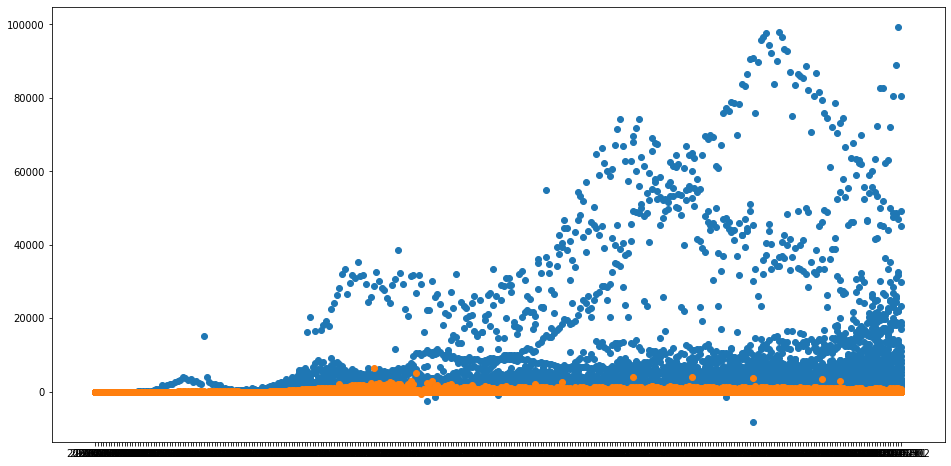

In [6]:
#plotting day vs new cases & new dealth
plt.figure(figsize=(16, 8))
plt.scatter(data.Date_reported,data.New_cases)
plt.scatter(data.Date_reported,data.New_deaths)

In [7]:
#rolling the data to 7 days mean
data.New_cases = data.New_cases.rolling(window=7).mean()
data.New_deaths = data.New_deaths.rolling(window=7).mean()

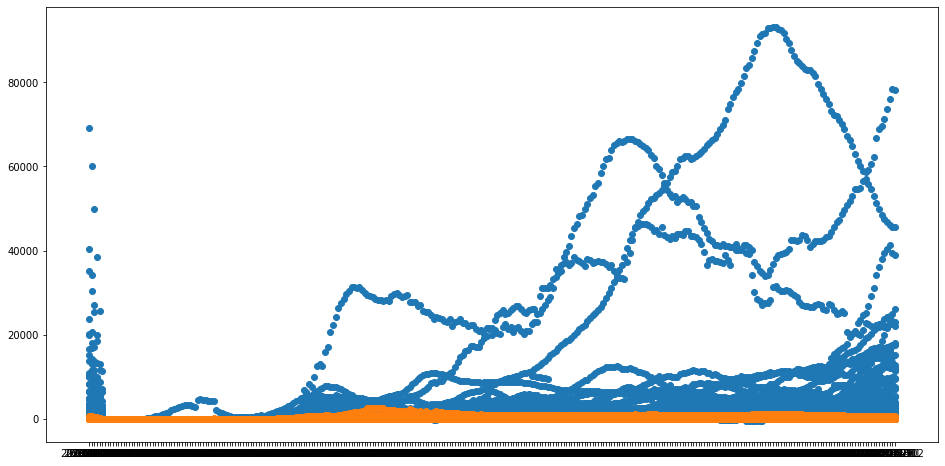

In [8]:
#plotting day vs new cases & new dealth after rolling
plt.figure(figsize=(16, 8))
plt.scatter(data.Date_reported,data.New_cases)
plt.scatter(data.Date_reported,data.New_deaths)

In [9]:
#preparing data for coutry wise death and total cases
countries = data.Country.unique();
countries_cumulative_cases = [];
countries_cumulative_deaths = [];

for country in countries:
    countries_cumulative_cases.append(data[data.Country == country]['Cumulative_cases'].max())
    countries_cumulative_deaths.append(data[data.Country == country]['Cumulative_deaths'].max())

<BarContainer object of 235 artists>

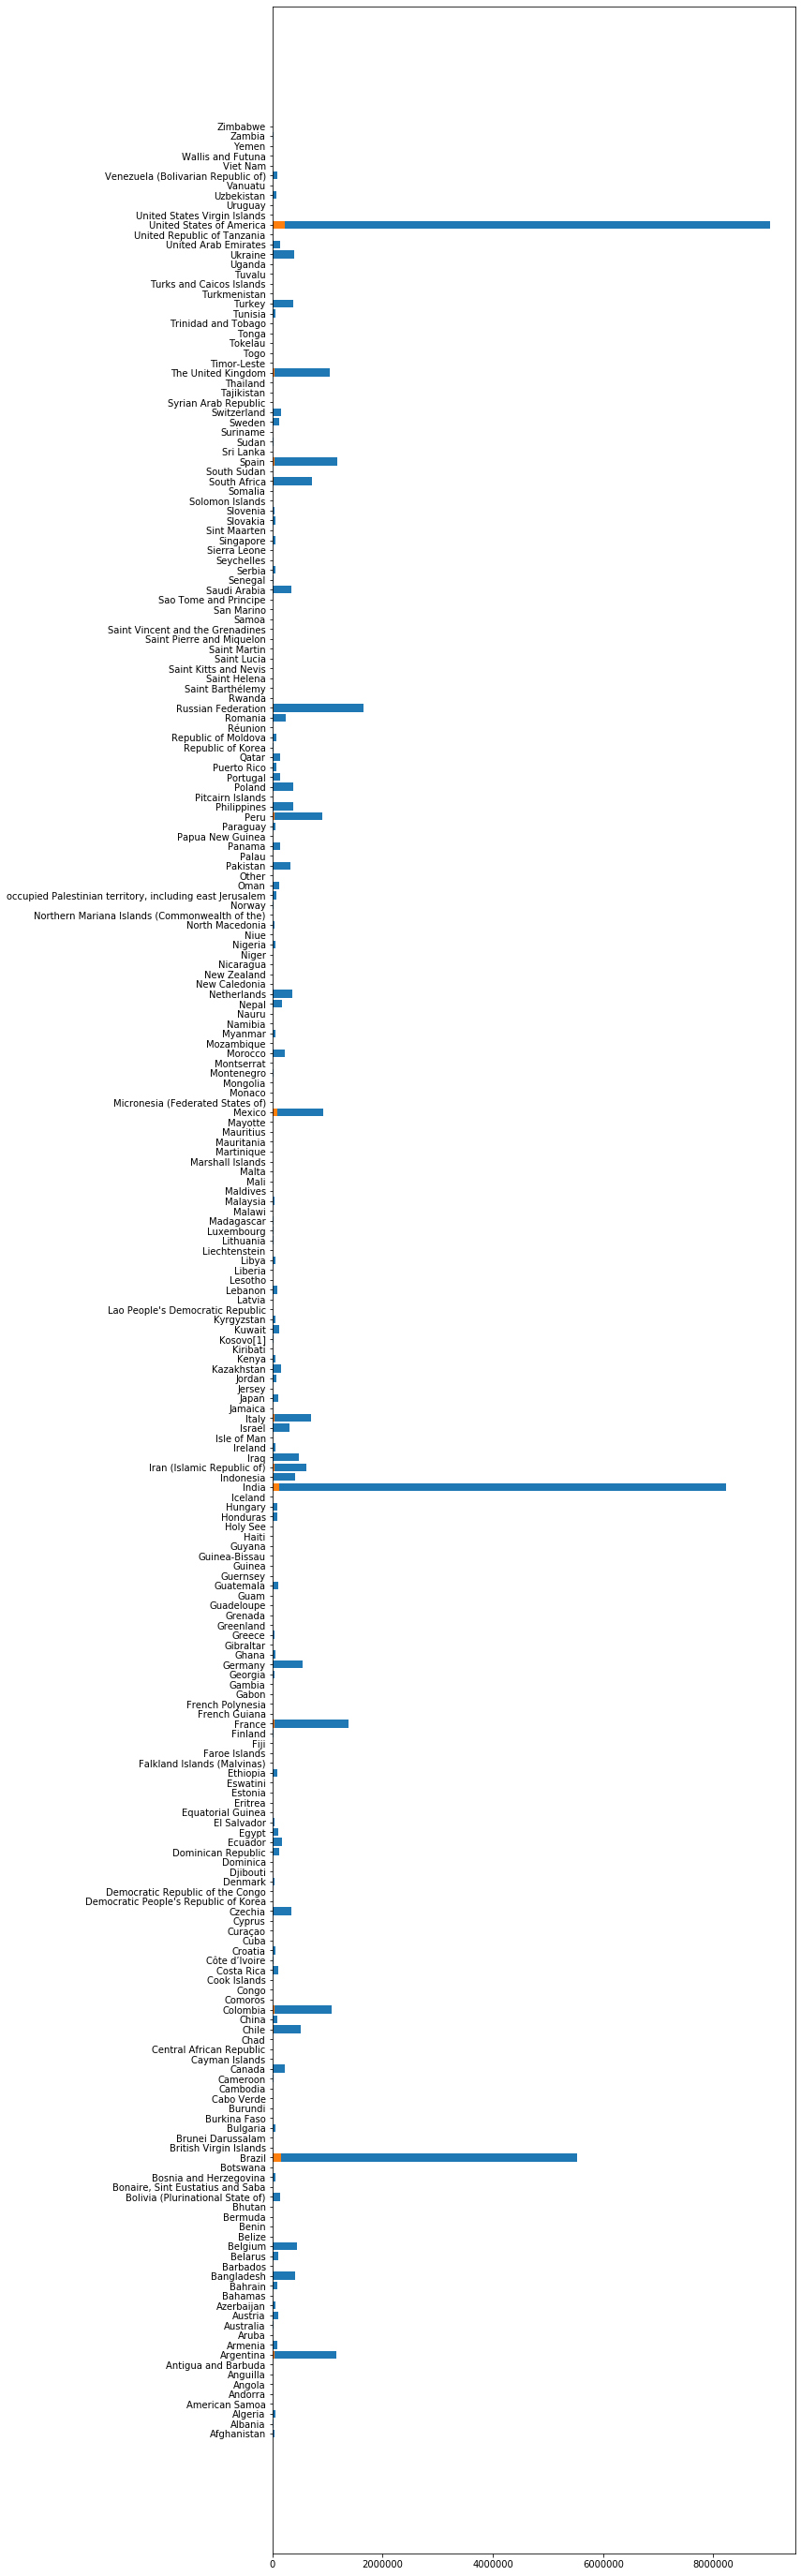

In [10]:
#plotting data
plt.figure(figsize=(10, 50))
plt.barh(countries,countries_cumulative_cases)
plt.barh(countries,countries_cumulative_deaths)

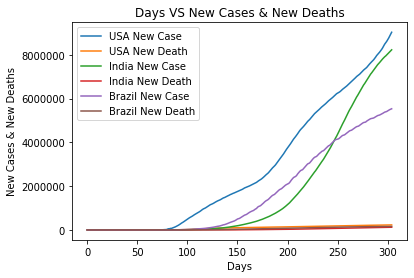

In [11]:
total_data_length = len(data.index);

#preparing each day data for USA
usa_data = data[data.Country == "United States of America"];
usa_data_length = len(usa_data.index);

#preparing data from India
india_data = data[data.Country == "India"];
india_data_length = len(india_data.index);

#preparing data from Brazil
brazil_data = data[data.Country == "Brazil"];
brazil_data_length = len(brazil_data.index);

#plotting data
plt.plot(range(usa_data_length), usa_data.Cumulative_cases, label='USA New Case')
plt.plot(range(usa_data_length), usa_data.Cumulative_deaths, label="USA New Death")

plt.plot(range(india_data_length), india_data.Cumulative_cases, label='India New Case')
plt.plot(range(india_data_length), india_data.Cumulative_deaths, label="India New Death")

plt.plot(range(brazil_data_length), brazil_data.Cumulative_cases, label='Brazil New Case')
plt.plot(range(brazil_data_length), brazil_data.Cumulative_deaths, label="Brazil New Death")

plt.title('Days VS New Cases & New Deaths')
plt.xlabel('Days')
plt.ylabel('New Cases & New Deaths')
plt.legend()
plt.show()

In [12]:
#splitting into test and train dataset
X_usa = np.reshape(range(usa_data_length),(usa_data_length,1));
y_usa = usa_data.Cumulative_cases;
X_train_usa, X_test_usa, y_train_usa, y_test_usa = train_test_split(X_usa, y_usa, test_size=0.2, random_state=1)

X_india = np.reshape(range(india_data_length),(india_data_length,1));
y_india = india_data.Cumulative_cases;
X_train_india, X_test_india, y_train_india, y_test_india = train_test_split(X_india, y_india, test_size=0.2, random_state=1)

X_brazil = np.reshape(range(brazil_data_length),(brazil_data_length,1));
y_brazil = brazil_data.Cumulative_cases;
X_train_brazil, X_test_brazil, y_train_brazil, y_test_brazil = train_test_split(X_brazil, y_brazil, test_size=0.2, random_state=1)

In [22]:
#linear regression
lin_reg_usa = LinearRegression()
lin_reg_usa.fit(X_train_usa, y_train_usa)

lin_reg_india = LinearRegression()
lin_reg_india.fit(X_train_india, y_train_india)

lin_reg_brazil = LinearRegression()
lin_reg_brazil.fit(X_train_brazil, y_train_brazil)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

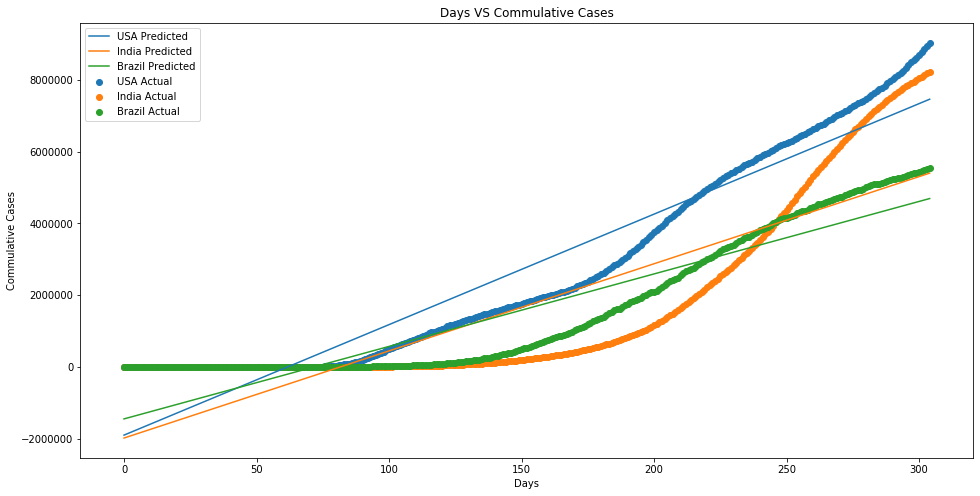

In [23]:
#plotting linear regression
plt.figure(figsize=(16, 8))

plt.scatter(X_usa, y_usa, label="USA Actual")
plt.plot(X_usa, lin_reg_usa.predict(X_usa), label="USA Predicted")

plt.scatter(X_india, y_india, label="India Actual")
plt.plot(X_india, lin_reg_india.predict(X_india), label="India Predicted")

plt.scatter(X_brazil, y_brazil, label="Brazil Actual")
plt.plot(X_brazil, lin_reg_brazil.predict(X_brazil), label="Brazil Predicted")

plt.title('Days VS Commulative Cases')
plt.xlabel('Days')
plt.ylabel('Commulative Cases')
plt.legend()
plt.show()

In [24]:
#predicting with linear regression for 500 days
linear_regression_prediction_length = 500;

linear_regression_prediction_X_usa = [];
linear_regression_prediction_y_usa = np.reshape(range(linear_regression_prediction_length),(linear_regression_prediction_length,1))

linear_regression_prediction_X_india = [];
linear_regression_prediction_y_india = np.reshape(range(linear_regression_prediction_length),(linear_regression_prediction_length,1))

linear_regression_prediction_X_brazil = [];
linear_regression_prediction_y_brazil = np.reshape(range(linear_regression_prediction_length),(linear_regression_prediction_length,1))

for i in range(linear_regression_prediction_length):
    linear_regression_prediction_X_usa.append(lin_reg_usa.predict([[i]])[0]);
    
    linear_regression_prediction_X_india.append(lin_reg_india.predict([[i]])[0]);
    
    linear_regression_prediction_X_brazil.append(lin_reg_brazil.predict([[i]])[0]);

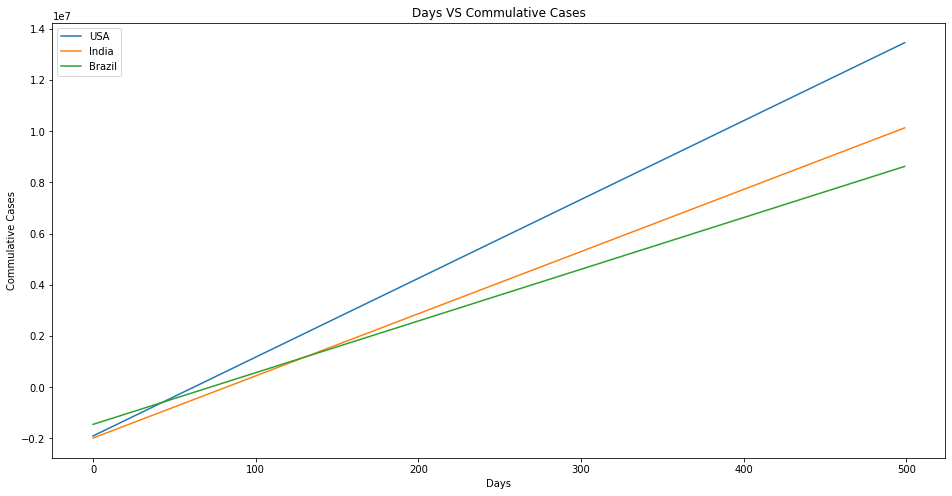

In [25]:
#plotting prediction of linear regression vs actual
plt.figure(figsize=(16, 8))

plt.plot(linear_regression_prediction_y_usa, linear_regression_prediction_X_usa, label="USA")
plt.plot(linear_regression_prediction_y_india, linear_regression_prediction_X_india, label="India")
plt.plot(linear_regression_prediction_y_brazil, linear_regression_prediction_X_brazil, label="Brazil")

plt.title('Days VS Commulative Cases')
plt.xlabel('Days')
plt.ylabel('Commulative Cases')
plt.legend()
plt.show()

In [26]:
#ploynomial regression
poly_reg_usa = PolynomialFeatures()
X_poly_usa = poly_reg_usa.fit_transform(X_train_usa)
pol_reg_usa = LinearRegression()
pol_reg_usa.fit(X_poly_usa, y_train_usa)

poly_reg_india = PolynomialFeatures()
X_poly_india = poly_reg_india.fit_transform(X_train_india)
pol_reg_india = LinearRegression()
pol_reg_india.fit(X_poly_india, y_train_india)

poly_reg_brazil = PolynomialFeatures()
X_poly_brazil = poly_reg_brazil.fit_transform(X_train_brazil)
pol_reg_brazil = LinearRegression()
pol_reg_brazil.fit(X_poly_brazil, y_train_brazil)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

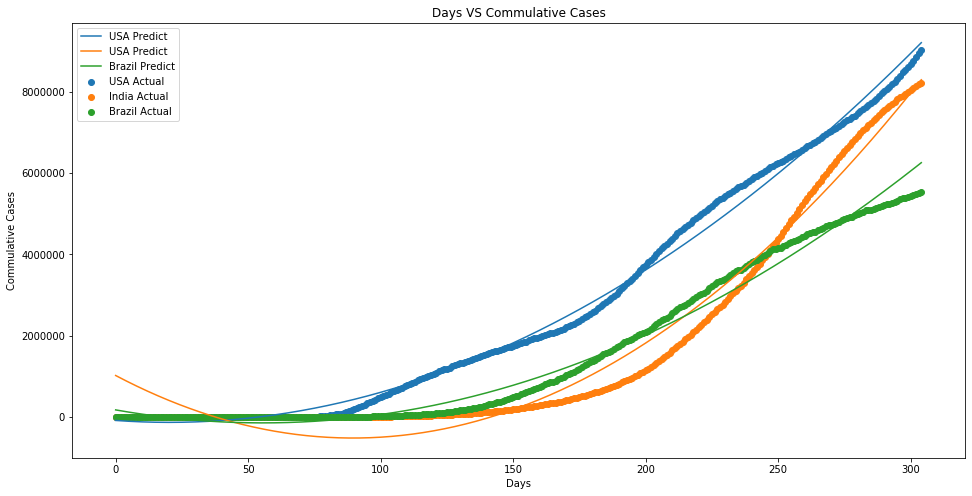

In [27]:
#plotting polynomial regression
plt.figure(figsize=(16, 8))

plt.scatter(X_usa, y_usa, label="USA Actual")
plt.plot(X_usa, pol_reg_usa.predict(poly_reg_usa.fit_transform(X_usa)), label="USA Predict")

plt.scatter(X_india, y_india, label="India Actual")
plt.plot(X_india, pol_reg_india.predict(poly_reg_india.fit_transform(X_india)), label="USA Predict")

plt.scatter(X_brazil, y_brazil, label="Brazil Actual")
plt.plot(X_brazil, pol_reg_brazil.predict(poly_reg_brazil.fit_transform(X_brazil)), label="Brazil Predict")

plt.title('Days VS Commulative Cases')
plt.xlabel('Days')
plt.ylabel('Commulative Cases')
plt.legend()
plt.show()

In [20]:
#predicting with polynomial regression for 500 days
polynomial_regression_prediction_length = 500;

polynomial_regression_prediction_X_usa = [];
polynomial_regression_prediction_y_usa = np.reshape(range(polynomial_regression_prediction_length),(polynomial_regression_prediction_length,1))

polynomial_regression_prediction_X_india = [];
polynomial_regression_prediction_y_india = np.reshape(range(polynomial_regression_prediction_length),(polynomial_regression_prediction_length,1))

polynomial_regression_prediction_X_brazil = [];
polynomial_regression_prediction_y_brazil = np.reshape(range(polynomial_regression_prediction_length),(polynomial_regression_prediction_length,1))

for i in range(polynomial_regression_prediction_length):
    prediction_usa = pol_reg_usa.predict(poly_reg_usa.fit_transform([[i]]))[0];
    polynomial_regression_prediction_X_usa.append(prediction_usa if prediction_usa > 0 else 0);
    
    prediction_india = pol_reg_india.predict(poly_reg_india.fit_transform([[i]]))[0];
    polynomial_regression_prediction_X_india.append(prediction_india if prediction_india > 0 else 0);
    
    prediction_brazil = pol_reg_brazil.predict(poly_reg_brazil.fit_transform([[i]]))[0];
    polynomial_regression_prediction_X_brazil.append(prediction_brazil if prediction_brazil > 0 else 0);

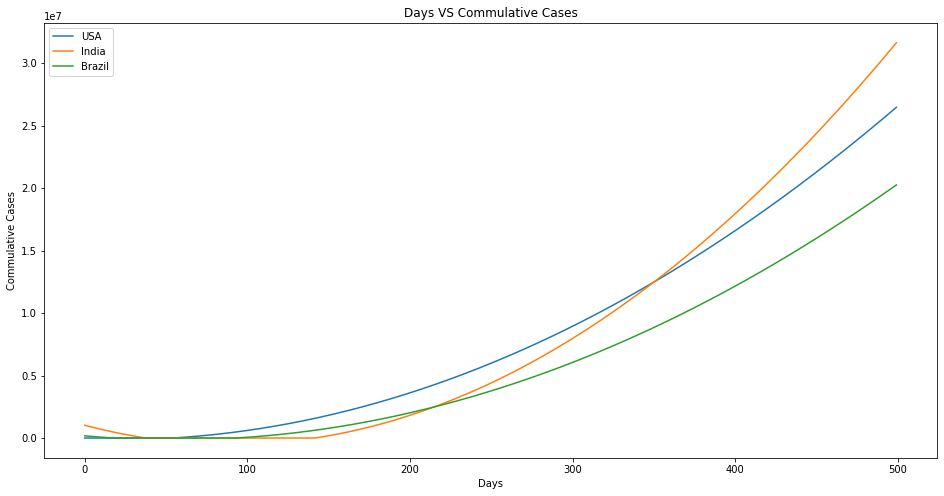

In [21]:
#plotting prediction of linear regression vs actual
plt.figure(figsize=(16, 8))

plt.plot(polynomial_regression_prediction_y_usa, polynomial_regression_prediction_X_usa, label='USA')

plt.plot(polynomial_regression_prediction_y_india, polynomial_regression_prediction_X_india, label='India')

plt.plot(polynomial_regression_prediction_y_brazil, polynomial_regression_prediction_X_brazil, label='Brazil')

plt.title('Days VS Commulative Cases')
plt.xlabel('Days')
plt.ylabel('Commulative Cases')
plt.legend()
plt.show()